In [1]:
from face_module.database import *
from face_module.proc import *

In [2]:
from facenet_models import FacenetModel

model = FacenetModel()

In [3]:
# run this once 

names = ["tom", "scarlet", "robert"]

for name in names : 
    proc(name)

C:\anaconda3\envs\capstone\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [4]:
dat = database(names)

In [59]:
import skimage.io as io

image = io.imread(r"C:\Users\caden\Programming\bwsi\ryan-sus\capstone\Face Recognition\data\test.jpg")
if image.shape[-1] == 4:
    # Image is RGBA, where A is alpha -> transparency
    # Must make image RGB.
    image = image[..., :-1]  # png -> RGB


SyntaxError: invalid syntax (2791444866.py, line 4)

<IPython.core.display.Javascript object>


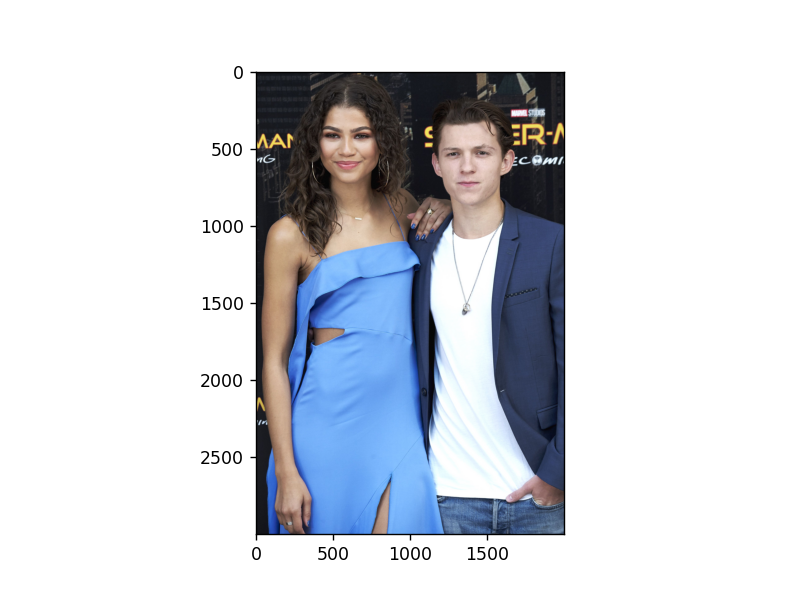

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.imshow(image)

In [27]:
boxes, probabilities, landmarks = model.detect(image)

In [55]:
descriptions = []
for index, box in enumerate(boxes) :
    descriptions.append(model.compute_descriptors(image, [box])) 

In [58]:
for descrp in descriptions :
    print(dat.predict(descrp))

tom
who tf is this
Unknown


In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

def doIt(model, db, vectorized_images):
    
    descriptions = []

    for image in vectorized_images :
        # assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
        boxes, probabilities, landmarks = model.detect(image)
        descriptions = model.compute_descriptors(image, boxes)
        fig, ax = plt.subplots()
        ax.imshow(image)
        for box, prob, description in zip(boxes, probabilities, descriptions):
            ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
            name = db.predict(description)
            plt.text(box[2]-80, box[3], name , color = "white")
        
        '''
        be able ot pass in an image
        and be able to detect all of the boxes
        and then run a predict for each box
        '''

In [ ]:
filepaths = []
    
person_path = "./data/" + "tom"

filelist = os.listdir(person_path)
for i in filelist:
    if i.endswith(".jpg" or ".png"):  # You could also add "and i.startswith('f')
        filepaths.append(person_path + "/" + i)



vectorized_images = []

for photo_path in filepaths :
    image = vectorize_photo(photo_path)
    vectorized_images.append(image)

doIt(model, dat, vectorized_images)